In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install kmodes
import numpy as np
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import PowerTransformer
from kmodes.kmodes import KModes


#import data
Test = pd.read_csv("au_test.csv")
Train = pd.read_csv("au_train.csv")

#Combine data frames to get total of individuals for Segmentation Study
combine = [Test, Train]  
total = pd.concat(combine)

In [106]:
#Exploratory Analysis Conducted in Prediction Task Notebook
total.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [107]:
total['class'] = total['class'].str.replace('.', '')


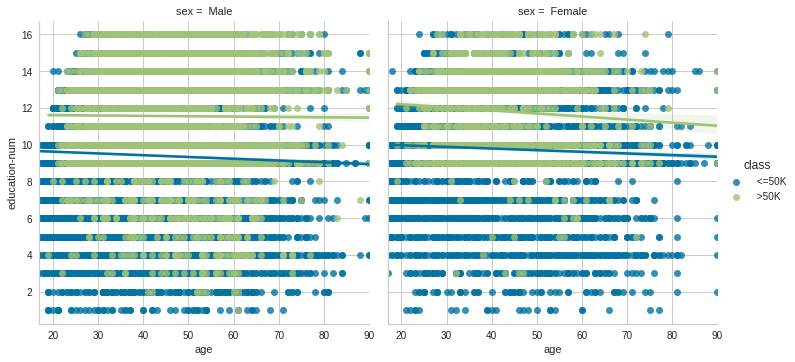

In [108]:
#Graph looking at how age, sex, and education have an effect on how much an individual makes.
sns.lmplot(x='age', y='education-num', hue = 'class', col = 'sex', data = total);


In [109]:
#From this graph we can see that, especially for females, a higher education level is more likely to make over 50k. We can also see that age is not necessarily as impactful when
#It comes to making over 50K.

In [110]:
total.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 347951.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7419, cost: 307884.0
Run 1, iteration: 2/100, moves: 336, cost: 307884.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9607, cost: 294583.0
Run 1, iteration: 2/100, moves: 1061, cost: 294583.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10055, cost: 290888.0
Run 1, iteration: 2/100, moves: 648, cost: 290888.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10564, cost: 287244.0
Run 1, iteration: 2/100, moves: 893, cost: 287244.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 12765, cost: 27

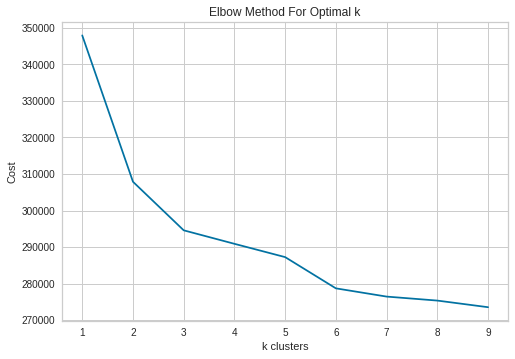

In [111]:
#Elbow Analysis for KModes algorithm to determine optimal number of clusters
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(total)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('k clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [112]:
#From the Elbow Method, we can see that the optimal number of clusters is 3 to 4.

In [113]:
#KModes modes with 4 clusters
km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(total)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 15558, cost: 289406.0
Run 1, iteration: 2/100, moves: 11752, cost: 280091.0
Run 1, iteration: 3/100, moves: 8576, cost: 278978.0
Run 1, iteration: 4/100, moves: 200, cost: 278978.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 21451, cost: 285246.0
Run 2, iteration: 2/100, moves: 128, cost: 285246.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 12111, cost: 283045.0
Run 3, iteration: 2/100, moves: 72, cost: 283045.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 16702, cost: 285494.0
Run 4, iteration: 2/100, moves: 3238, cost: 285309.0
Run 4, iteration: 3/100, moves: 113, cost: 285309.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration:

In [114]:
#Using KModes, 4 Cluster Centroids were discovered. 
#'23' ' Private' '216129' ' HS-grad' '9' ' Never-married' ' Other-service' ' Not-in-family' ' White' ' Male' '0' '0' '40'' United-States' ' <=50K'
#'20' ' Private' '117789' ' Some-college' '10' ' Never-married' ' Sales' ' Own-child' ' White' ' Female' '0' '0' '40' ' United-States' ' <=50K'
#'46' ' Private' '125892' ' Bachelors' '13' ' Married-civ-spouse' ' Prof-specialty' ' Husband' ' White' ' Male' '0' '0' '40'' United-States' ' >50K'
#'37' ' Private' '126569' ' HS-grad' '9' ' Married-civ-spouse' ' Craft-repair' ' Husband' ' White' ' Male' '0' '0' '40'' United-States' ' <=50K'